## Interactive Simple Bootstrap Demonstration

### Boostrap for Uncertainty in Sample Statistics, The Red and Green Balls with a Cowboy Hat Tutorial

* in class I bring in 3 red balls, 2 green balls and my cowboy hat, yes I have one, recall I was a farmhand in Alberta, Canada

* then I have students volunteer, one holds the hat, one draws balls with replacement and one scribes the results on the board

* through multiple bootstrap smaple sets we demonstrate the use of bootstrap to calculate uncertainty in the proportion from the sample itself

* with this workflow we all provide an interactive plot demonstration with matplotlib and ipywidget packages

#### Bootstrap

Uncertainty in the sample statistics
* one source of uncertainty is the paucity of data.
* do 200 or even less wells provide a precise (and accurate estimate) of the mean? standard deviation? skew? P13?

Would it be useful to know the uncertainty in these statistics due to limited sampling?
* what is the impact of uncertainty in the mean porosity e.g. 20%+/-2%?

**Bootstrap** is a method to assess the uncertainty in a sample statistic by repeated random sampling with replacement.

Assumptions
* sufficient, representative sampling, identical, idependent samples

Limitations
1. assumes the samples are representative 
2. assumes stationarity
3. only accounts for uncertainty due to too few samples, e.g. no uncertainty due to changes away from data
4. does not account for boundary of area of interest 
5. assumes the samples are independent
6. does not account for other local information sources

The Bootstrap Approach (Efron, 1982)

Statistical resampling procedure to calculate uncertainty in a calculated statistic from the data itself.
* Does this work?  Prove it to yourself, for uncertainty in the mean solution is standard error: 

\begin{equation}
\sigma^2_\overline{x} = \frac{\sigma^2_s}{n}
\end{equation}

Extremely powerful - could calculate uncertainty in any statistic!  e.g. P13, skew etc.
* Would not be possible access general uncertainty in any statistic without bootstrap.
* Advanced forms account for spatial information and sampling strategy (game theory and Journel’s spatial bootstrap (1993).

Steps: 

1. assemble a sample set, must be representative, reasonable to assume independence between samples

2. optional: build a cumulative distribution function (CDF)
    * may account for declustering weights, tail extrapolation
    * could use analogous data to support

3. For $\ell = 1, \ldots, L$ realizations, do the following:

    * For $i = \alpha, \ldots, n$ data, do the following:

        * Draw a random sample with replacement from the sample set or Monte Carlo simulate from the CDF (if available). 

6. Calculate a realization of the sammary statistic of interest from the $n$ samples, e.g. $m^\ell$, $\sigma^2_{\ell}$. Return to 3 for another realization.

7. Compile and summarize the $L$ realizations of the statistic of interest.

This is a very powerful method.  Let's try it out.


#### Objective 

Provide an example and demonstration for:

1. interactive plotting in Jupyter Notebooks with Python packages matplotlib and ipywidgets
2. provide an intuitive hands-on example of statistical boostrap   

#### Load the Required Libraries

The following code loads the required libraries.

In [1]:
%matplotlib inline
from ipywidgets import interactive                        # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
import matplotlib.pyplot as plt                           # plotting
import numpy as np                                        # working with arrays
import pandas as pd                                       # working with DataFrames
import seaborn as sns                                     # for matrix scatter plots
from scipy.stats import triang                            # parametric distributions
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import triang
from scipy import stats                                   # statistical calculations
import random                                             # random drawing / bootstrap realizations of the data
from matplotlib.gridspec import GridSpec

#### Make a Synthetic Dataset

This is an interactive method to:

* select a parametric distribution

* select the distribution parameters

* select the number of samples and visualize the synthetic dataset distribution

In [2]:
# parameters for the synthetic dataset
bins = np.linspace(0,1000,1000)

# interactive calculation of the sample set (control of source parametric distribution and number of samples)
l = widgets.Text(value='                                           Simple Boostrap Demonstration',layout=Layout(width='950px', height='30px'))

a = widgets.IntSlider(min=0, max = 100, value = 2, step = 1, description = '$n_{red}$',orientation='horizontal',layout=Layout(width='400px', height='20px'))
a.style.handle_color = 'red'

b = widgets.IntSlider(min=0, max = 100, value = 3, step = 1, description = '$n_{green}$',orientation='horizontal',layout=Layout(width='400px', height='20px'))
b.style.handle_color = 'green'

c = widgets.IntSlider(min=1, max = 16, value = 3, step = 1, description = '$L$',orientation='horizontal',layout=Layout(width='400px', height='20px'))
c.style.handle_color = 'gray'

ui = widgets.HBox([a,b,c],)                               # basic widget formatting           
ui2 = widgets.VBox([l,ui],)

def f_make(a, b, c):                                      # function to take parameters, make sample and plot
    red_freq = make_data(a, b, c)

    labels = ['Red', 'Green']
    nrows = np.round(np.sqrt(c)+0.4,0); ncols = np.round(c / nrows + 0.4,0)
    plt.clf()
    
    for i in range(0, c): 
        plt.subplot(ncols,nrows,i + 1) 
        draw = [red_freq[i],a + b - red_freq[i]]
        plt.grid(zorder=0, color='black', axis = 'y', alpha = 0.2); plt.ylim(0,a + b); 
        plt.ylabel('Frequency'); plt.xlabel('Balls Drawn')
        plt.yticks(np.arange(0,a + b + 1,1))
        barlist = plt.bar(labels,draw, edgecolor = "black", linewidth = 3, alpha = 0.4); plt.title('Realization #' + str(i+1),zorder = 1) 
        barlist[0].set_color('r'); barlist[1].set_color('g')
            
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2 * nrows, wspace=0.2, hspace=0.2)
    plt.show()

def make_data(a, b, c):                                   # function to check parameters and make sample   
    prop_red = np.zeros(c)
    for i in range(0, c): 
        prop_red[i] = np.random.multinomial(a+b,[a/(a+b),b/(a+b)], size = 1)[0][0]
    return prop_red

# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(f_make, {'a': a, 'b': b, 'c': c})
interactive_plot.clear_output(wait = True)                # reduce flickering by delaying plot updating

<Figure size 640x480 with 0 Axes>

### Simple Bootstrap Demonstration - Drawing Red and Green Balls from a Virtual Cowboy Hat

* drawing red and green balls from a hat with replacement to access uncertainty in the proportion 

* interactive plot demonstration with ipywidget, matplotlib packages

### The Problem

Let's simulate bootstrap, resampling with replacement from a hat with $n_{red}$ and $n_{green}$ balls

* **$n_{red}$**: number of red balls in the sample (placed in the hat)

* **$n_{green}$**: number of green balls in the sample (placed in the hat)

* **$L$**: number of bootstrap realizations

In [3]:
display(ui2, interactive_plot)                            # display the interactive plot

Output()

#### Summarizing Bootstrap Uncertainty

* Run more bootstrap realizations and evaluate the uncertianty model

Now instead of looking at each bootstrap result, let's make many and summarize with:

* **box and whisker plot** of the red and green ball frequencies

* **histograms** of the red and green ball frequencies.

Uncertainty in Proportion of Red Balls: 
P10: 0.2
P50: 0.4
P90: 0.8


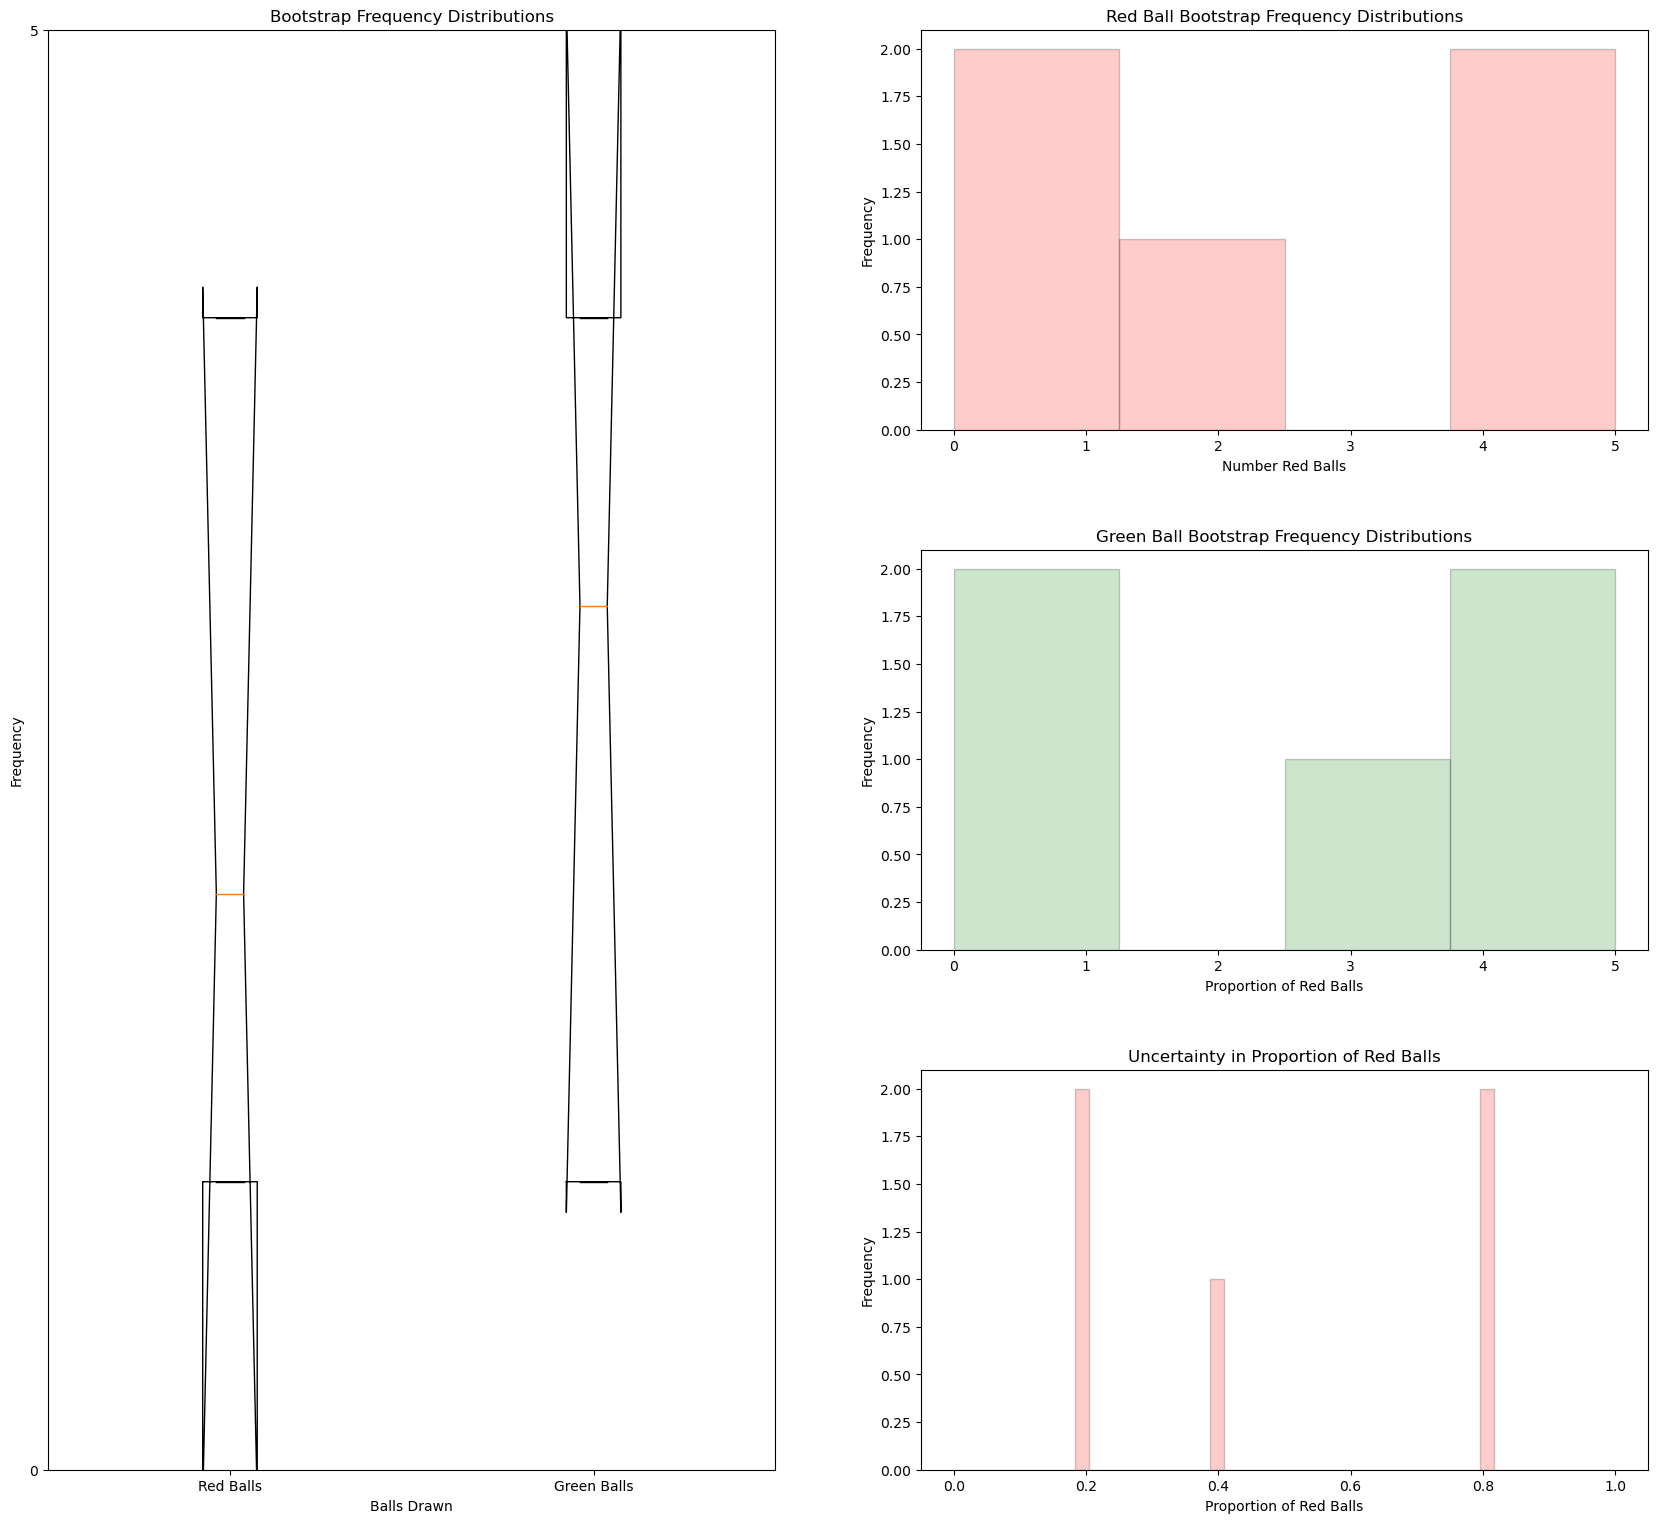

In [4]:
# parameters for the synthetic dataset
bins = np.linspace(0,1000,1000)

# interactive calculation of the sample set (control of source parametric distribution and number of samples)
l2 = widgets.Text(value='                                Simple Boostrap Demonstration',layout=Layout(width='950px', height='30px'))

a2 = widgets.IntSlider(min=0, max = 100, value = 2, step = 1, description = '$n_{red}$',orientation='horizontal',layout=Layout(width='400px', height='20px'))
a2.style.handle_color = 'red'

b2 = widgets.IntSlider(min=0, max = 100, value = 3, step = 1, description = '$n_{green}$',orientation='horizontal',layout=Layout(width='400px', height='20px'))
b2.style.handle_color = 'green'

c2 = widgets.IntSlider(min=5, max = 1000, value = 3, step = 1, description = '$L$',orientation='horizontal',layout=Layout(width='400px', height='20px'))
c2.style.handle_color = 'gray'

uib = widgets.HBox([a2,b2,c2],)                               # basic widget formatting           
uib2 = widgets.VBox([l2,uib],)

def s_make(a, b, c):                                      # function to take parameters, make sample and plot
    red_freq = make_data(a, b, c)
    green_freq = (a + b) - red_freq
    prop_red = red_freq / (a + b)
    labels = ['Red Balls', 'Green Balls']
    bins = np.linspace(0,a + b, a + b)

    fig = plt.figure(constrained_layout=False)
    gs = GridSpec(3, 2, figure=fig)
    
    ax1 = fig.add_subplot(gs[:, 0])
    ax1.boxplot([red_freq,green_freq],labels = labels, notch = True, sym = '+')
    ax1.set_ylim(0,a + b)
    ax1.grid(zorder=0, color='black', axis = 'y', alpha = 0.2); plt.ylim(0,a + b); 
    ax1.set_ylabel('Frequency'); ax1.set_xlabel('Balls Drawn');ax1.set_title('Bootstrap Frequency Distributions')
    ax1.set_yticks(np.arange(0,a + b + 1,5))

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.hist(red_freq,alpha=0.2,color="red",edgecolor="black", bins = bins)
    ax2.set_title('Red Ball Bootstrap Frequency Distributions'); ax2.set_xlabel('Number Red Balls'); ax2.set_ylabel('Frequency') 

    ax3 = fig.add_subplot(gs[1, 1])
    ax3.hist(green_freq,alpha=0.2,color="green",edgecolor="black", bins = bins)
    ax3.set_title('Green Ball Bootstrap Frequency Distributions'); ax3.set_xlabel('Proportion of Red Balls'); ax3.set_ylabel('Frequency') 

    ax4 = fig.add_subplot(gs[2, 1])
    ax4.hist(prop_red,alpha=0.2,color="red",edgecolor="black", bins = np.linspace(0,1,50))
    ax4.set_title('Uncertainty in Proportion of Red Balls'); ax4.set_xlabel('Proportion of Red Balls'); ax4.set_ylabel('Frequency') 
    
    print('Uncertainty in Proportion of Red Balls: ')
    print('P10: ' + str(np.round(np.percentile(prop_red,10),2)))
    print('P50: ' + str(np.round(np.percentile(prop_red,50),2)))
    print('P90: ' + str(np.round(np.percentile(prop_red,90),2)))
    
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=3.0, wspace=0.2, hspace=0.3)
    plt.show()

# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(s_make, {'a': a2, 'b': b2, 'c': c2})
interactive_plot.clear_output(wait = True)                # reduce flickering by delaying plot updating

### Simple Bootstrap Demonstration - Summarizing the Uncertainty in Frequencies

* drawing red and green balls from a hat with replacement to access uncertainty in the proportion 

* run many bootstrap realizations and summarize the results

* interactive plot demonstration with ipywidget, matplotlib packages

### The Problem

Let's simulate bootstrap, resampling with replacement from a hat with $n_{red}$ and $n_{green}$ balls

* **$n_{red}$**: number of red balls in the sample (placed in the hat)

* **$n_{green}$**: number of green balls in the sample (placed in the hat)

* **$L$**: number of bootstrap realizations

In [5]:
display(uib2, interactive_plot)                           # display the interactive plot

Output()

#### Observations

Some observations:

* sampling distribution for proportions become discrete with too fee samples, only n cases are possible

* enough bootstrap realizations are rquired for stable statistics


#### Comments

This was a simple demonstration of interactive plots in Jupyter Notebook Python with the ipywidgets and matplotlib packages.

<i>&copy; Copyright daytum 2021. All Rights Reserved</i>